## SECTION 1 
### Introduction to the problem/task and dataset

PumpkinSeed-ML-Insights is a comprehensive repository dedicated to the exploration and analysis of Turkish pumpkin seed varieties, with a focus on classifying whether a seed belongs to Urgup Sivrisi or Cercevelik species. This project demonstrates the knowledge of authors in data science and machine learning.

Within this repository, you will find a Jupyter Notebook that serves as a self-explanatory document, guiding you through the entire process. This repository also contains three Python files, each implementing a different machine learning model: `knn_pumpkinseed.py`, `logistic_regression_pumkinseed.py`, and `neural_network_pumpkinseed.py`. There is also the `pumpkin_seeds.csv`, which contains the data and `Pumpkin_seeds.pdf`, which contains some description of the dataset.



---
## SECTION 2
### Description of the dataset

`pumpkin_seeds.csv` is a CSV file containing information about Pumpkin Seeds found in Turkey. 

This dataset came from the study `The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.).` by Koklu, M., Sarigil, S., & Ozbek, O. in 2021. In their paper, they used a product shooting box to obtain quality images of the pumpkin seeds. The authors converted the images to a gray tone and then to binary images. To convert the image data into a CSV file, they extracted 12 morphological features.

Overall, the CSV file has 13 columns/features and 2500 rows. The first 12 columns are from the extracted morphological features, while the last column classifies whether it belongs to the Urgup Sivrisi or Cercevelik species. There are 2500 rows, representing a single seed used in the study. There are 1200 Urgup Sivrisi and 1300 Cercevelik species of pumpkin seeds. 

The features found in this CSV file are as follows:
1. Area – Number of pixels within the borders of a pumpkin seed
2. Perimeter – Circumference in pixels of a pumpkin seed
3. Major_Axis_Length – Large axis distance of a pumpkin seed
4. Minor_Axis_Length – Small axis distance of a pumpkin seed
5. Convex_Area – Number of pixels of the smallest convex shell at the region formed by the
pumpkin seed.
6. Equiv_Diameter – Computed as !4𝑎⁄𝜋, where 𝑎 is the area of the pumpkin seed.
7. Eccentricity – Eccentricity of a pumpkin seed
8. Solidity – Convex condition of the pumpkin seeds
9. Extent – Ratio of a pumpkin seed area to the bounding box pixels
10. Roundness – Ovality of pumpkin seeds without considering the distortion of the edges.
11. Aspect_Ration – Aspect ratio of the pumpkin seeds
12. Compactness – Proportion of the area of the pumpkin seed relative to the area of the circle
with the same circumference
13. Class – Either Cercevelik or Urgup Sivrisi



---
## SECTION 3

### List of Requirements

---
## SECTION 4

### Data preprocessing and cleaning



The first step is to address the encoding issues, especially in the "Class" column. The unique values in the "Class" column are showing encoding issues, as evidenced by the presence of escape characters like \x82. These values are intended to represent the two species of pumpkin seeds. To correct this, we need to replace these incorrectly encoded strings with a correct format. We replaced the string class names with an integer value of 0 and 1.

In [ ]:
import numpy as np
import pandas as pd
import csv

In [ ]:
data = []

with open('pumpkin_seeds.csv', 'r', encoding='utf-8', errors='replace') as csv_file:
    raw_data = csv.reader(csv_file)

    #Skip headers
    next(raw_data)

    #Store data into data array
    for row in raw_data:
        row_data = []
        for i in range(13): #Convert errors into 1 or 2 (depending on their specie)
            if i == 12 and row[i] == '�er�evelik':
                row_data.append(int(0))
            elif i == 12 and row[i] == '�rg�p Sivrisi':
                row_data.append(int(1))
            else:
                row_data.append(row[i])

        data.append(row_data)

#Convert data into numpy array
np_data = np.array(data)
np_data


### Data Scaling

The numerical features are scaled using `StandardScaler` from `sklearn.preprocessing`. This ensures that all features have a mean of 0 and a standard deviation of 1, which is particularly important for many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Replace 'original_column_names' with the actual list of column names
original_column_names = ['area', 'perimeter', 'major_axis_length', 'minor_axis_length', 
                         'convex_area', 'equiv_diameter', 'eccentricity', 'solidity', 
                         'extent', 'roundness', 'aspect_Ration', 'compactness', 'class']

# Convert the numpy array to a pandas DataFrame using the original column names
pumpkin_seeds_data = pd.DataFrame(np_data, columns=original_column_names)

# Selecting only the numerical features for scaling
numerical_features = pumpkin_seeds_data.iloc[:, :-1]

# Initializing the Standard Scaler
scaler = StandardScaler()

# Scaling the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Creating a new DataFrame with scaled values using the original column names (excluding 'class')
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=original_column_names[:-1])

# Adding the non-numerical column ('class') back to the DataFrame
scaled_pumpkin_seeds_data = pd.concat([scaled_numerical_df, pumpkin_seeds_data['class']], axis=1)

scaled_pumpkin_seeds_data

After cleaning the data, it is now time to define our X and y variables. The X variable will hold the features, while the y variable contains our target. 

In [ ]:
# Creating the feature set 'X' and the target 'y'
X = scaled_pumpkin_seeds_data.iloc[:, :-1]  # All columns except the last one
y = scaled_pumpkin_seeds_data['class']      # Only the last column

Let's separate the training from the test set. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print('X_train shape', X_train.shape)
print('y_train shape', X_test.shape)
print('X_test shape', y_train.shape)
print('y_test shape', y_test.shape)

---------------------------------------------------------------------------
## SECTION 5 - Exploratory Data Analysis (EDA)

### Descriptive Statistics
Here, we examine the descriptive statistics of the numerical features. This includes measures like mean, median, standard deviation, and quartiles, which provide insights into the central tendency and spread of the data.

In [ ]:
# Descriptive Statistics for Numerical Features
descriptive_stats = scaled_pumpkin_seeds_data.describe()
descriptive_stats

### Feature Distributions

In [ ]:
# Visualizing the Distribution of Each Feature
import matplotlib.pyplot as plt

features = scaled_pumpkin_seeds_data.columns[:-1]  # Excluding the class column
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.hist(scaled_pumpkin_seeds_data[feature], bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Box Plots for Numerical Features

In [ ]:
# Box Plots for Each Feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=scaled_pumpkin_seeds_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

---------------------------------------------------------------------------
## SECTION 6 - Models

### kNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
# Initializing the KNN classifier
model = KNeighborsClassifier()

In [130]:
# Training the model on the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [131]:
# Calculating the accuracy of the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy*100, '%')

Accuracy: 84.64 %


In [132]:
# Setting arbitrary value (5) for the number of neighbors
neighbors = 5

In [133]:
distances, data_index = model.kneighbors(X_test,neighbors)

In [145]:
# Display top neighbors of the test data
np.squeeze(distances)
np.squeeze(data_index)
print('Top 5 neighbors of the test data:')
for i in range(len(5)):
    print('Neighbor:', i+1)
    print('Distance:', distances[i])
    print('Data index:', data_index[i])
    print('Class:', y_train.iloc[data_index[i]])
    print('\n')


Top neighbors of the test data:
Neighbor: 1
Distance: [0.37667245 0.38534916 0.42516737 0.51772652 0.56535081]
Data index: [1013 1655 1545   88  578]
Class: 483    0
334    0
697    0
994    0
650    0
Name: class, dtype: object


Neighbor: 2
Distance: [0.27668796 0.33858965 0.41720963 0.43050033 0.59795748]
Data index: [1578  761  629 1803  154]
Class: 192     0
977     0
1614    1
1618    1
1726    1
Name: class, dtype: object


Neighbor: 3
Distance: [0.74117956 0.80023294 0.84236182 0.85125498 0.87566489]
Data index: [ 427  735   67 1584  120]
Class: 2211    1
1631    1
1492    1
2108    1
2035    1
Name: class, dtype: object


Neighbor: 4
Distance: [0.72313609 0.74173517 0.87831546 0.88230532 0.9566115 ]
Data index: [ 557   75 1276  579   89]
Class: 2190    1
2495    1
2326    1
1460    1
2418    1
Name: class, dtype: object


Neighbor: 5
Distance: [0.44098618 0.53158715 0.53389406 0.79481034 0.82690164]
Data index: [ 882  177  425  121 1426]
Class: 1161    0
584     0
433     0
59

In [135]:
# Import cross validation libraries
from sklearn.model_selection import cross_val_score

In [136]:
k_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
scores = np.zeros((len(k_choices), k_folds))

In [137]:
for i in range(len(k_choices)):
    model = KNeighborsClassifier(n_neighbors=k_choices[i])
    scores[i] = cross_val_score(model, X_train, y_train, cv=k_folds)

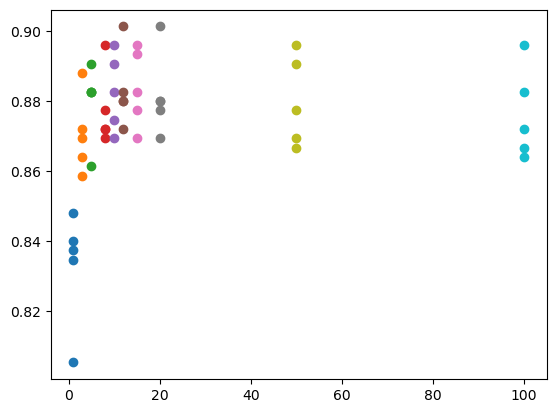

In [138]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

In [139]:
# Calculate the average scores of each fold
avg_scores = np.mean(scores, axis=1)
print('Average scores:', avg_scores)

Average scores: [0.83306667 0.8704     0.88       0.87733333 0.88266667 0.8832
 0.88373333 0.8816     0.88       0.87626667]


In [140]:
# Get average accuracy for each k
stddev_scores = np.std(scores, axis=1)
print('Standard deviation of scores:', stddev_scores)

Standard deviation of scores: [0.01456693 0.00992057 0.00983418 0.00968848 0.00983418 0.00974702
 0.00992057 0.0106132  0.01156239 0.01175755]


Text(0, 0.5, 'Cross-validation accuracy')

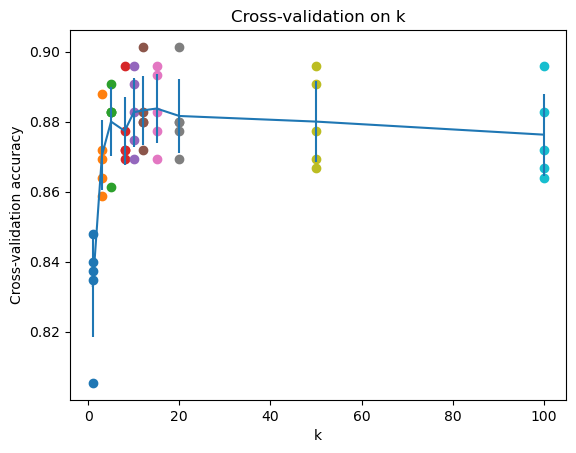

In [141]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

In [142]:
# Test on selected k value
model = KNeighborsClassifier(n_neighbors=12)

# Training the model on the training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [143]:
# Calculating the accuracy of the model on the test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy*100, '%')

Accuracy: 86.72 %


### Logistic Regression

### Naive Bayes